In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Students%20Performance%20in%20Exams/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.rename(columns={'race/ethnicity':'ethnicity','parental level of education':'parent_education'},inplace=True);
df.rename(columns=lambda x:x.strip().replace(' ','_'),inplace=True)
df.columns

Index(['gender', 'ethnicity', 'parent_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [10]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [11]:
df['ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

In [12]:
df['parent_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent_education, dtype: int64

In [13]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [14]:
df['test_preparation_course'].value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

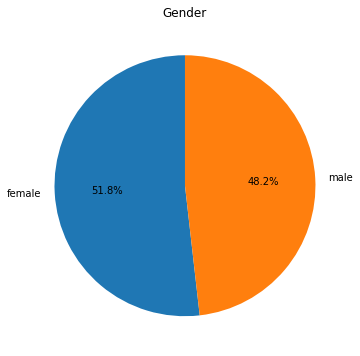

In [15]:
labels=df['gender'].value_counts().index
values=df['gender'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender')
plt.show()

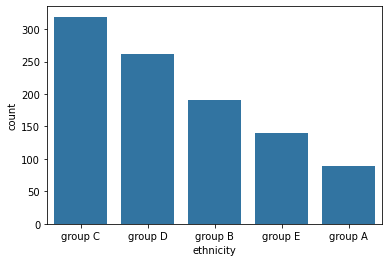

In [16]:
base_color=sns.color_palette()[0]
freq=df['ethnicity'].value_counts()
gen_order=freq.index
sns.countplot(data=df,x='ethnicity',color=base_color,order=gen_order);

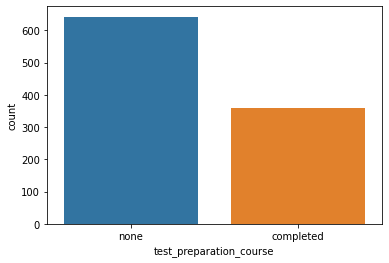

In [17]:
sns.countplot(data=df,x='test_preparation_course');

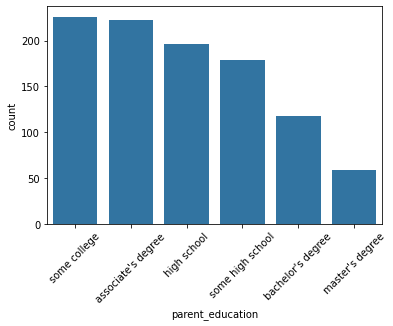

In [18]:
base_color=sns.color_palette()[0]
freq=df['parent_education'].value_counts()
gen_order=freq.index
sns.countplot(data=df,x='parent_education',color=base_color,order=gen_order)
plt.xticks(rotation=45);

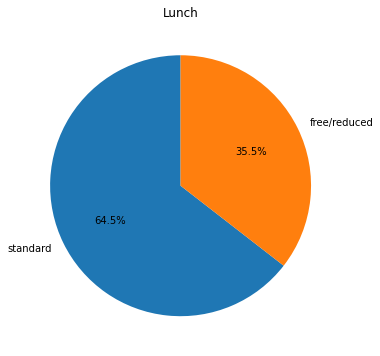

In [19]:
labels=df['lunch'].value_counts().index
values=df['lunch'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Lunch')
plt.show()

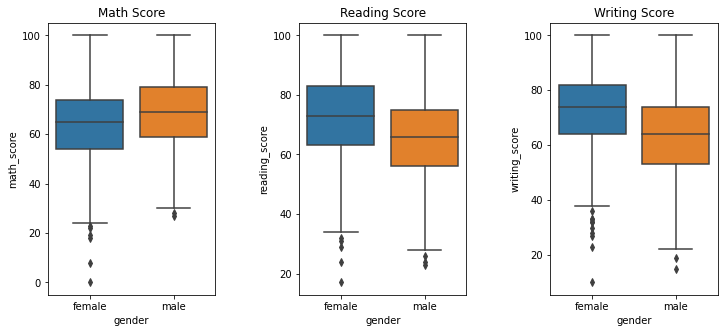

In [20]:
fig, ax = plt.subplots(figsize=(12,5), ncols=3)
fig.subplots_adjust(wspace=1/2)
ax[0].set_title('Math Score')
sns.boxplot(ax=ax[0],x=df['gender'],y=df['math_score'])


ax[1].set_title('Reading Score')
sns.boxplot(ax=ax[1],x=df['gender'],y=df['reading_score'])


ax[2].set_title('Writing Score')
sns.boxplot(ax=ax[2],x=df['gender'],y=df['writing_score']);

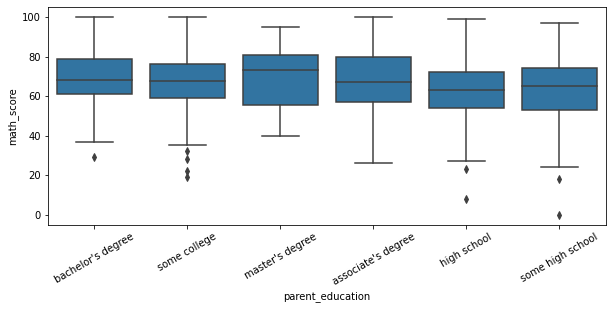

In [21]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['parent_education'],y=df['math_score'],color= sns.color_palette()[0])
plt.xticks(rotation=30);

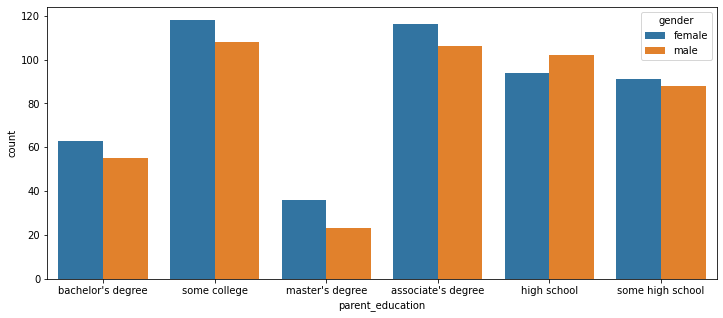

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['parent_education'],hue=df['gender']);

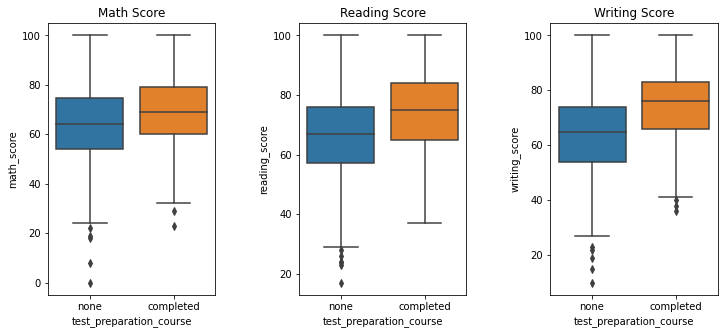

In [23]:
fig, ax = plt.subplots(figsize=(12,5), ncols=3)
fig.subplots_adjust(wspace=1/2)
ax[0].set_title('Math Score')
sns.boxplot(ax=ax[0],x=df['test_preparation_course'],y=df['math_score'])


ax[1].set_title('Reading Score')
sns.boxplot(ax=ax[1],x=df['test_preparation_course'],y=df['reading_score'])


ax[2].set_title('Writing Score')
sns.boxplot(ax=ax[2],x=df['test_preparation_course'],y=df['writing_score']);

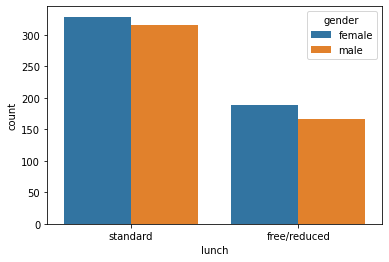

In [24]:
sns.countplot(x=df['lunch'],hue=df['gender']);

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


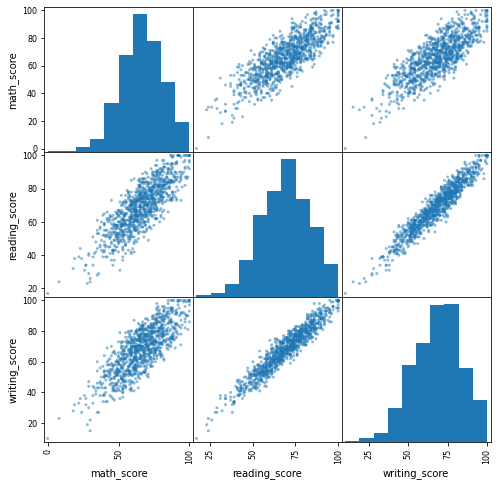

In [25]:
pd.plotting.scatter_matrix(df,figsize=(8,8));

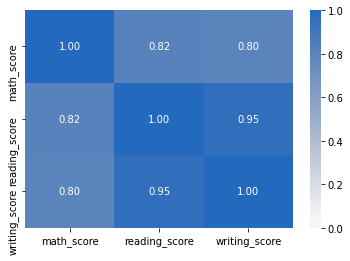

In [26]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='vlag_r',center=0,vmin=0);

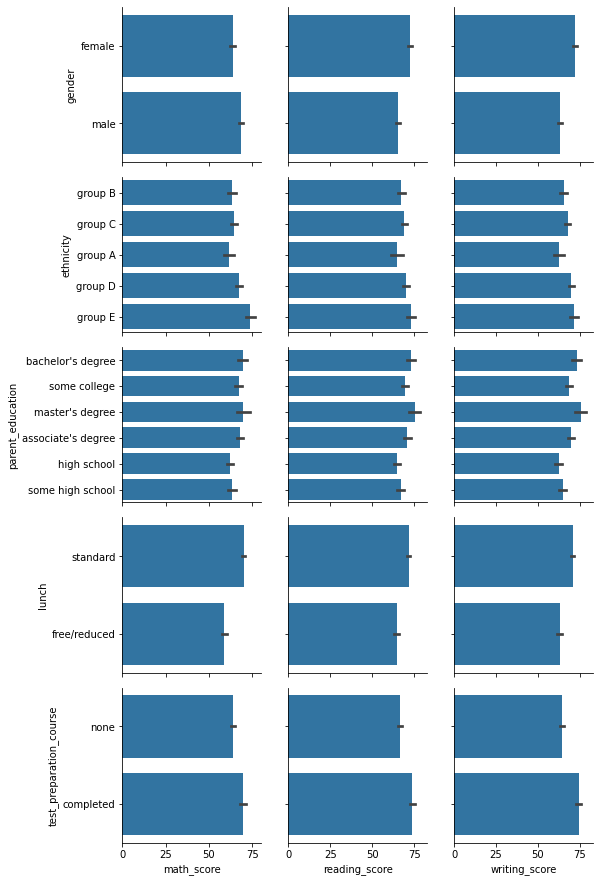

In [27]:
g=sns.PairGrid(data=df,x_vars=['math_score','reading_score','writing_score']
              ,y_vars=['gender','ethnicity','parent_education','lunch','test_preparation_course'])
g.map(sns.barplot,color= sns.color_palette()[0]);